# HW1 Notebook - Part 2


Welcome to **part 2** of your second HW notebook!


<br/>
<div class='info'>
    
<font size='5'>☝🏽</font> **Note:** Make sure you've completed the [Part 1 Notebook](HW1-P1.ipynb)

</div>


## Notebook Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
import seaborn as sns

# styling additions
from IPython.display import HTML
# style = "<style>div.warn{background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
style = "<style>div.info{padding: 15px; border: 1px solid transparent; border-left: 5px solid #dfb5b4; border-color: transparent; margin-bottom: 10px; border-radius: 4px; background-color: #fcf8e3; border-color: #faebcc;}</style>"
HTML(style)

# Problem 2 - Linear Regression

Now, we're going to implement our linear regression model that we discussed in class. 

## Problem Setup

Lets begin by first **simulating** our dataset. To do this we need to actually specify a **true function**:

$$\text{readmission_day} = \boldsymbol{f}(\text{age})$$

which relates someones age to the day they will be readmitted. Normally, the universe specifies this function. But since we are doing some simulation, we get to specify it here! 

Write a function called `true_f` that does the following:

$$
\text{true_f}(age) = -age + 130
$$

In [2]:
# EDIT HERE


Lets go ahead and plot it, but taking some **random integer** age values between $[1-100)$. 

To do this, we need to make use of `NumPy`'s new `Random API`. You can check out its [Quick Start Guide 🔗](https://numpy.org/doc/stable/reference/random/index.html) for a quick overview. There, you will see that we first need to setup a **R**andom **N**umber **G**enerator (RNG) like this:

In [3]:
from numpy.random import default_rng
rng = default_rng()

Now we can use this RNG to draw random things! Like Integers! Checking its API by using tab-complete
```python
rng.in<TAB>
```
shows us the `rng.integers` function. Lets get its documentation:

In [4]:
rng.integers?

Ok, so we need to specify the `low`, `high` and `size` parameters.

Draw `100` random integers between `1-100` into a variable called `ages`:

In [5]:
# EDIT HERE


Now lets give them to our true function to give us the `true_readmission_days` variable:

In [6]:
# EDIT HERE


Now lets try to plot it!

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:** Plotting using the `matplotlib` library is its own special thing. **We will learn it by looking at many examples** and I will almost always give you the plotting code which you can just change around for your needs. 

</div>

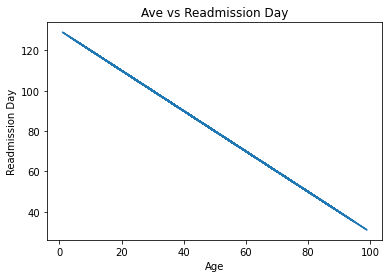

In [7]:
plt.plot(ages,true_readmission_days);
plt.xlabel('Age')
plt.ylabel('Readmission Day')
plt.title('Ave vs Readmission Day');

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:** Why is this a straight line? Comment below!

</div>

---

---

Now, it is almost always the case that in the real world, we don't actually **observe** the true function **directly**. If we did that would certainly be easier! 

Instead, what we observe is a **noisy-version** of this true function. This **noise** could come from many places. For example, people don't always come in on the day they **need** to come in. They might wait a bit because of work. Or they might come in before they need to, because their friend came in, etc.

We can **model** the effect of this **observation noise** as some **Gaussian Noise** which offsets the true value by a little.

This sounds fancier than it is. All this means for us, is that instead of observing the true readmission day, we observe a "randomly wiggled" (shifted) version of it.

Lets make a new function called `noisy_f` to take this into account, and use

```python
rng.normal
```

to model this noise:

In [8]:
rng.normal?

For now, we just need to give a `scale` parameter which you can think of representing the **amount-of-wiggle** we want. 

Lets go ahead and define the function. Define a function called `noisy_f` which:
- calls `true_f` 
- adds a the appropriate amount of wiggle:

In [9]:
noise_var = 10
def noisy_f(age):
    noise_vals = rng.normal(scale=noise_var,size=age.shape)
    # EDIT HERE

**Note**: This function actually calls `noisy_f()`! 

Now lets make a scatter plot of it!

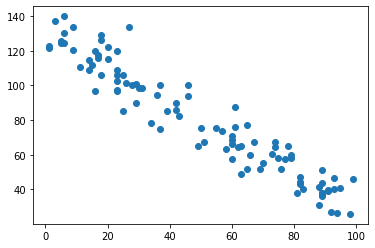

In [10]:
plt.scatter(ages,noisy_f(ages));

This looks much lore like some *real* data would. 

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Go back and play with the `noise_var` parameter and re-plot your dataset. What do you observe? Comment below!

</div>

---

---

## Dataset Generation

Now that we have our **observation model** (fancy name for our true function) specified, we can actually create our dataset! 

Lets say I want to "observe" the readmission day for `N=200` people whose ages I also have. Lets first get `N` many random ages again:

In [11]:
N = 200
ages = # EDIT HERE

Now lets **observe** (through noise) their readmission days:

In [12]:
readmission_days = # EDIT HERE

As above, lets plot our real dataset:

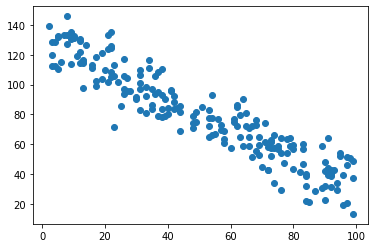

In [13]:
plt.scatter(ages,readmission_days);

Now we have our raw dataset! 

## Dataset Preparation

Now we're ready to "mathematize" everything and form our **dataset matrix**: $\boldsymbol{X}$  and our **target vector**: $\boldsymbol{y}$.


Recall from our linear regression discussion, these look like:

$$
X \in \mathbb{R}^{N \times d} =
\begin{bmatrix}
\text{---}  \boldsymbol{x}^T_1  \text{---} \\
\text{---}  \boldsymbol{x}^T_2 \text{---} \\
 \vdots  \\
\text{---}  \boldsymbol{x}^T_N  \text{---}
\end{bmatrix} \;\;\;\; \text{and} \;\;\;\;
\boldsymbol{y} \in \mathbb{R}^{N}= 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{bmatrix}
$$ 

Since we're going to form these ourselves now, lets again be very clear about their shapes and what $N$ and $d$ mean here. 

Recall, we think of each **row** of $\boldsymbol{X}$ as a vector 

$$\boldsymbol{x} = \begin{bmatrix}1 \\ \text{age}\end{bmatrix}$$


This means that our original 1-dimensional dataset of `ages`, is now being described by a vector in $\mathbb{R}^2$, where one of the dimensions is being forced to be $1$.

This means we can rewrite $\boldsymbol{X}$ as 

$$
X \in \mathbb{R}^{N \times d} =
\begin{bmatrix}
1 & \text{age}_1\\
1 & \text{age}_2 \\
\ldots & \ldots \\
1 & \text{age}_N
\end{bmatrix} 
$$

How do we form this using the `ages` we defined above? Lets check its shape:

In [14]:
ages.shape

(200,)

Aha! Lets give it that missing column shape! One way to do this, is using the:

```python
np.reshape
```

function

In [64]:
np.reshape?

This function can also be called directly on an array and takes the new shape for each dimension.

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  This function allows you to use `-1` to represent the last dimension! This makes it very easy to reshape!

</div>

Lets use it to reshape the `ages` vector:

In [15]:
ages_col_vec = ages.reshape(-1,1)
ages_col_vec.shape

(200, 1)

Now, lets generate another vector of 1s that is the same shape, using the very useful:

```python
np.ones_like
```

function.

In [16]:
np.ones_like?

This function generates an array of ones that is the same shape as the array you give it. Lets use it here:

In [17]:
ones_col_vec = np.ones_like(ages_col_vec)
ones_col_vec.shape

(200, 1)

Perfect! Now we can **concatenate** over the column axis using NumPy's 

```python 
np.concatenate
``` 
function

In [18]:
np.concatenate?

We see this function takes a tuple of arrays to join, and then we must specify over what `axis` we want them to be concatenated, where `axis=0` means the row axis, and `axis=1` means the column axis. 

We want to stack these column-wise, so we will use `axis=1`:

In [19]:
X = np.concatenate((ones_col_vec, ages_col_vec), axis=1)
X.shape

(200, 2)

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  `NumPy`'s `axis` argument is always `=0` for rows and `=1` for columns, and you need to be careful with this when you are operating on multi-dimensional arrays!

</div>

Lets take a peak at our X matrix and see if it looks correct:

In [20]:
X[:5,:]

array([[ 1, 31],
       [ 1, 84],
       [ 1, 57],
       [ 1, 44],
       [ 1, 35]])

This looks good! Each row represents a person here!

Now, lets do the same for our vector y:

In [21]:
y = # EDIT HERE
y.shape

(200, 1)

Lets plot again using our Matrix and Vector to verify:

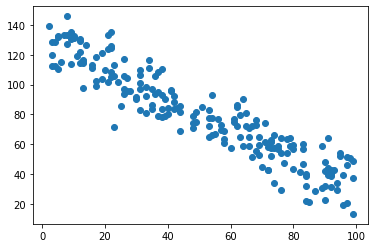

In [22]:
plt.scatter(X[:,1],y);

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Why did we use `[X:,1]` here? Comment below!

</div>

---

---

Still looks good! We're ready to move on!

## Specifying a hypothesis/model (line)

Ok. We've done some work here to make this nice and concise. Lets remind ourselves what it means to specify a particular hypothesis/model/line using this notation. 

In class, we said that a vector $\boldsymbol{w}$ represents a line in this notation, where $\boldsymbol{w}$ is like:

$$
\boldsymbol{w}^T = \left[ \text{intercept} \;\; \text{slope}   \right]
$$

So that means by specifying a random $\boldsymbol{w}$, thats specifying a random line. Lets pick a random $\boldsymbol{w}$ vector here and **see a line!**

Below, pick two random values between -2 and 2. Make sure the size of the vector is `(2,1)`

In [23]:
w_rand = # EDIT HERE
w_rand.shape

(2, 1)

One way to visualize this "line" is to draw our estimates for each of our data points.

<br/>
<div class='info'>

<font size='5'>⌨️</font> **CODE IT UP:**  How did we generate this in class? Edit the cell below!

</div>

In [ ]:
y_hat_rand = # EDIT HERE

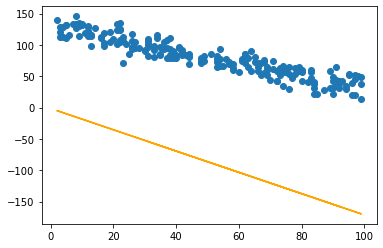

In [24]:
plt.scatter(ages, readmission_days);
plt.plot(ages, y_hat_rand, color='orange');

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Go back and re-run those two cells above and make some observations below.

</div>

---

---

## The best line

Well, that random line is not so good! We could definitely do better! 

In fact, in class we learned how to specify the best possible line according to the formula:

$$
\boldsymbol{w}_{lin} = \left( X^T X\right)^{-1} X^T \cdot \boldsymbol{y}
$$

To calculate this, we will make use of:
- the `.dot` function which can be called directly on an array, 
- the `np.linalg.inv` function for matrix-inversion
- the `.transpose` function which has an **excellent** shortcut as `.T` and can be called directly on an array!

In [25]:
w_lin = # EDIT HERE

Wow! That was fast! Lets take a look at what it got:

In [26]:
w_lin

array([[130.33507113],
       [ -0.99754796]])

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Compare this value with the actual line specified in the `true_f` function defined above. What do you notice? Comment below!

</div>

---


---

Now, lets visually compare the random guess above with this optimal one!

<br/>
<div class='info'>

<font size='5'>⌨️</font> **CODE IT UP:**  Generate your estimates using the `w_lin` vector we just made above. Edit the cell below!

</div>

In [ ]:
y_hat_lin = # EDIT HERE

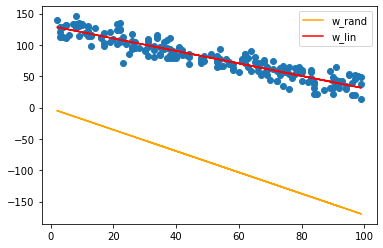

In [27]:
plt.scatter(ages, readmission_days);
plt.plot(ages, y_hat_rand, color='orange', label='w_rand');
plt.plot(ages, y_hat_lin, color='red', label='w_lin');
plt.legend();

Clearly our optimal one is better! Lets see how much better! 

## Calculating error

Lets see how much error our best model actually has by calculating it! 

Recall the **MSE** can be written as:

$$
\frac{1}{N} \|\boldsymbol{X}\boldsymbol{w} - \boldsymbol{y}\|_2^2
$$

Or equivalently in terms of the estimates $\hat{\boldsymbol{y}} = \boldsymbol{X}\boldsymbol{w}$ as:

$$
\frac{1}{N} \| \hat{\boldsymbol{y}} - \boldsymbol{y}\|_2^2
$$

Calculate the MSE of `w_lin`:

<br/>
<div class='info'>

<font size='5'>💡</font> **Hint:** You can use the `myMSE` function you defined in Part 1, with a small modification! 

</div>

In [28]:
def myMSE(a,b):
    # EDIT HERE
    # NOTE: the change you need to make from HW1-P1!

In [29]:
y_hat_lin = # EDIT HERE
myMSE(y_hat_lin,y)

123.0735394516865

Lets verify this is correct using `sklearn`'s built in `mean_squared_error` function, which takes to parameters:
- the predictions
- the actual values

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_hat_lin,y)

123.0735394516865

Great! 

For comparison's sake, lets calculate the error of the random line we chose above:

In [31]:
y_hat_rand = # EDIT HERE
myMSE(y_hat_rand,y)

28514.188381723245

Wow! Thats (typically) much larger! 

# Problem 3 -  Multiple Linear Regression

What about if we actually 2 or 3 or etc. many different variables/features per sample? Well, as we will quickly show, the machinery we've just developed will easily pay off now!


<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  Above, we performed **Simple Linear Regression** - that is, we only had a single independent variable: age. 

If we have multiple independent variables, then we are performing **Multiple Linear Regression**, or alternatively, multi-dimensional linear regression. 
</div>


<br/>
<div class='info'>
    
<font size='5'>☝🏽</font> **Note:** This is not the same thing as **Multi-variate** Linear Regression or Polynomial Regression!
</div>

---

## Dataset Preparation

For this problem, lets use a **toy dataset** that already comes loaded in the `scikit-learn`library. We will become much more acquainted with this library later on. For now, lets just use it to load in the **diabetes** dataset for us.

According to the [documentation🔗](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset), for this dataset: 

    Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
    
Lets load it in:

In [32]:
from sklearn import datasets
diabetes = datasets.load_diabetes() 

This returns `Bunch` object, which is a fancy name for a **dictionary**. This gives us information about the dataset. For example, we can see the names of the included features as:

In [33]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

This dataset has 10 features. To make this simpler, lets just use **two features**: 
- `age`  
- `bmi` 

and try to use **multiple linear regression** to learn the relationship between them and the target.

Lets grab those two features from the original dataset, and prepend our column of 1's to form our dataset matrix:

In [ ]:
dia_age = diabetes.data[:,0].reshape(-1,1)
dia_bmi = diabetes.data[:,2].reshape(-1,1)

In [34]:
X = # EDIT HERE
X.shape

(442, 3)

Lets also grab the response:

In [35]:
y = diabetes.target.reshape(-1,1)
y.shape

(442, 1)

Perfect! Out of curiosity, lets plot it:

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  This is our first example of a 3D plot 📈 in matplotlib. To make this interactive I've changed the "plotting mode" of the notebook using the [magic command🔗](https://ipython.readthedocs.io/en/stable/interactive/magics.html):
    
```python
%matplotlib notebook
```

This lets you use your mouse to rotate the plot. If you dont like this mode for 2D plots, you can change it back "to normal" by using 
    
```python
%matplotlib inline
```
    
</div>

<IPython.core.display.Javascript object>


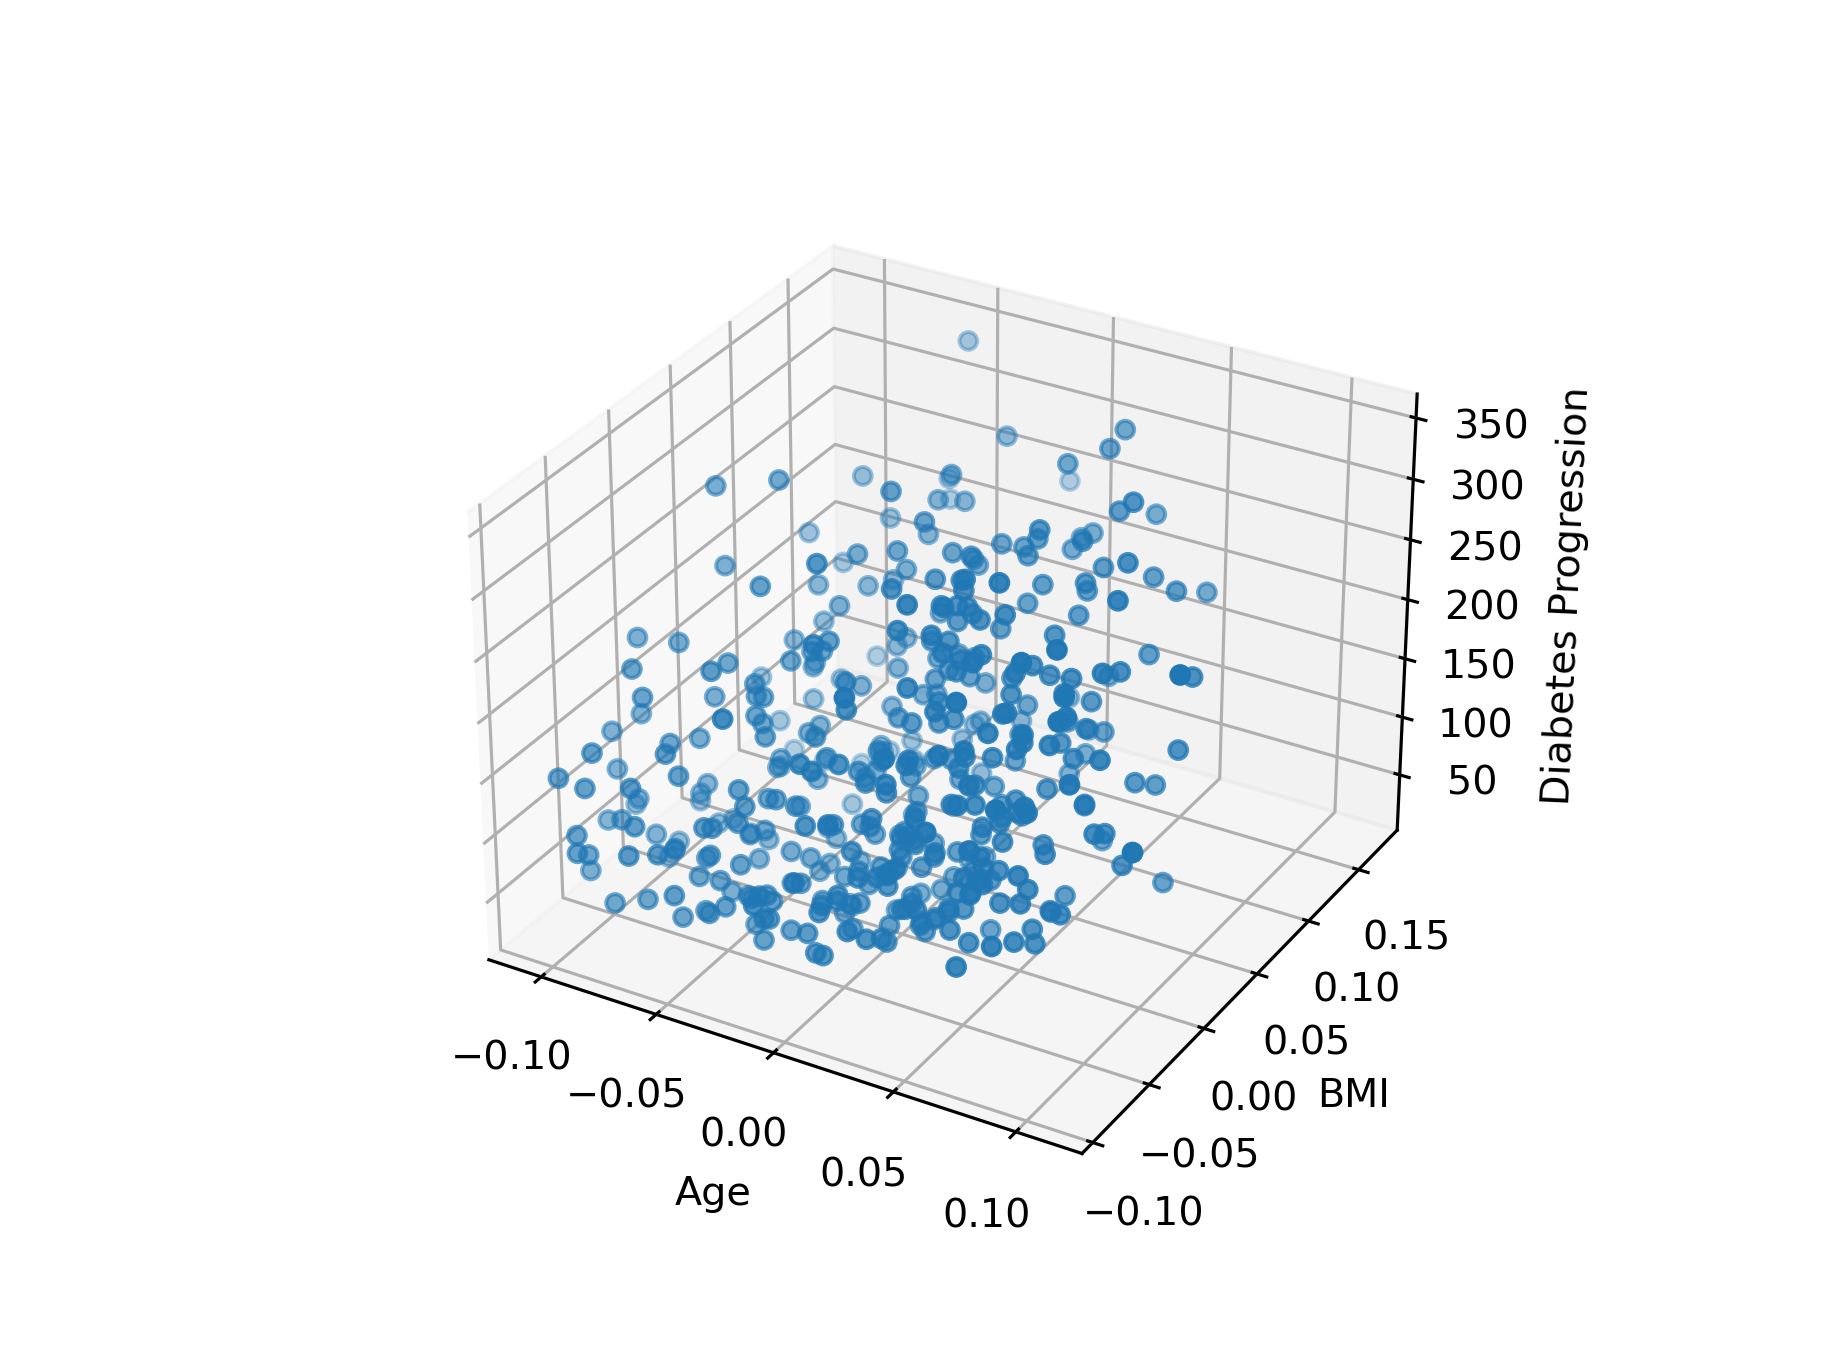

In [36]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1],X[:,2],y);
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Diabetes Progression');

<br/>
<div class='info'>

<font size='5'>👆</font> **Experiment:**  Click around the plot and rotate it to get a feel for the data.

</div>

## The best "line"

Now we're ready to use the exact same machinery we built above to learn our best "line", which in 3D is called a "plane" and more generally, a "hyper-plane".

In [37]:
w_lin = # EDIT HERE

Great! Thats it! Now all we have to do is generate the points on the plan to plot. This is a bit technical to 3D plotting, so I'll just go ahead and give you the code here without comment yet.

In [38]:
px = np.linspace(-0.15,0.15,20)
py = np.linspace(-0.15,0.2,20)
pX,pY = np.meshgrid(px,py)
pZ = w_lin[0] + pX*w_lin[1] + pY*w_lin[2]

Now we should have `pX,pY,pZ` contain the 3D points making up the plane. Lets plot it!

<IPython.core.display.Javascript object>


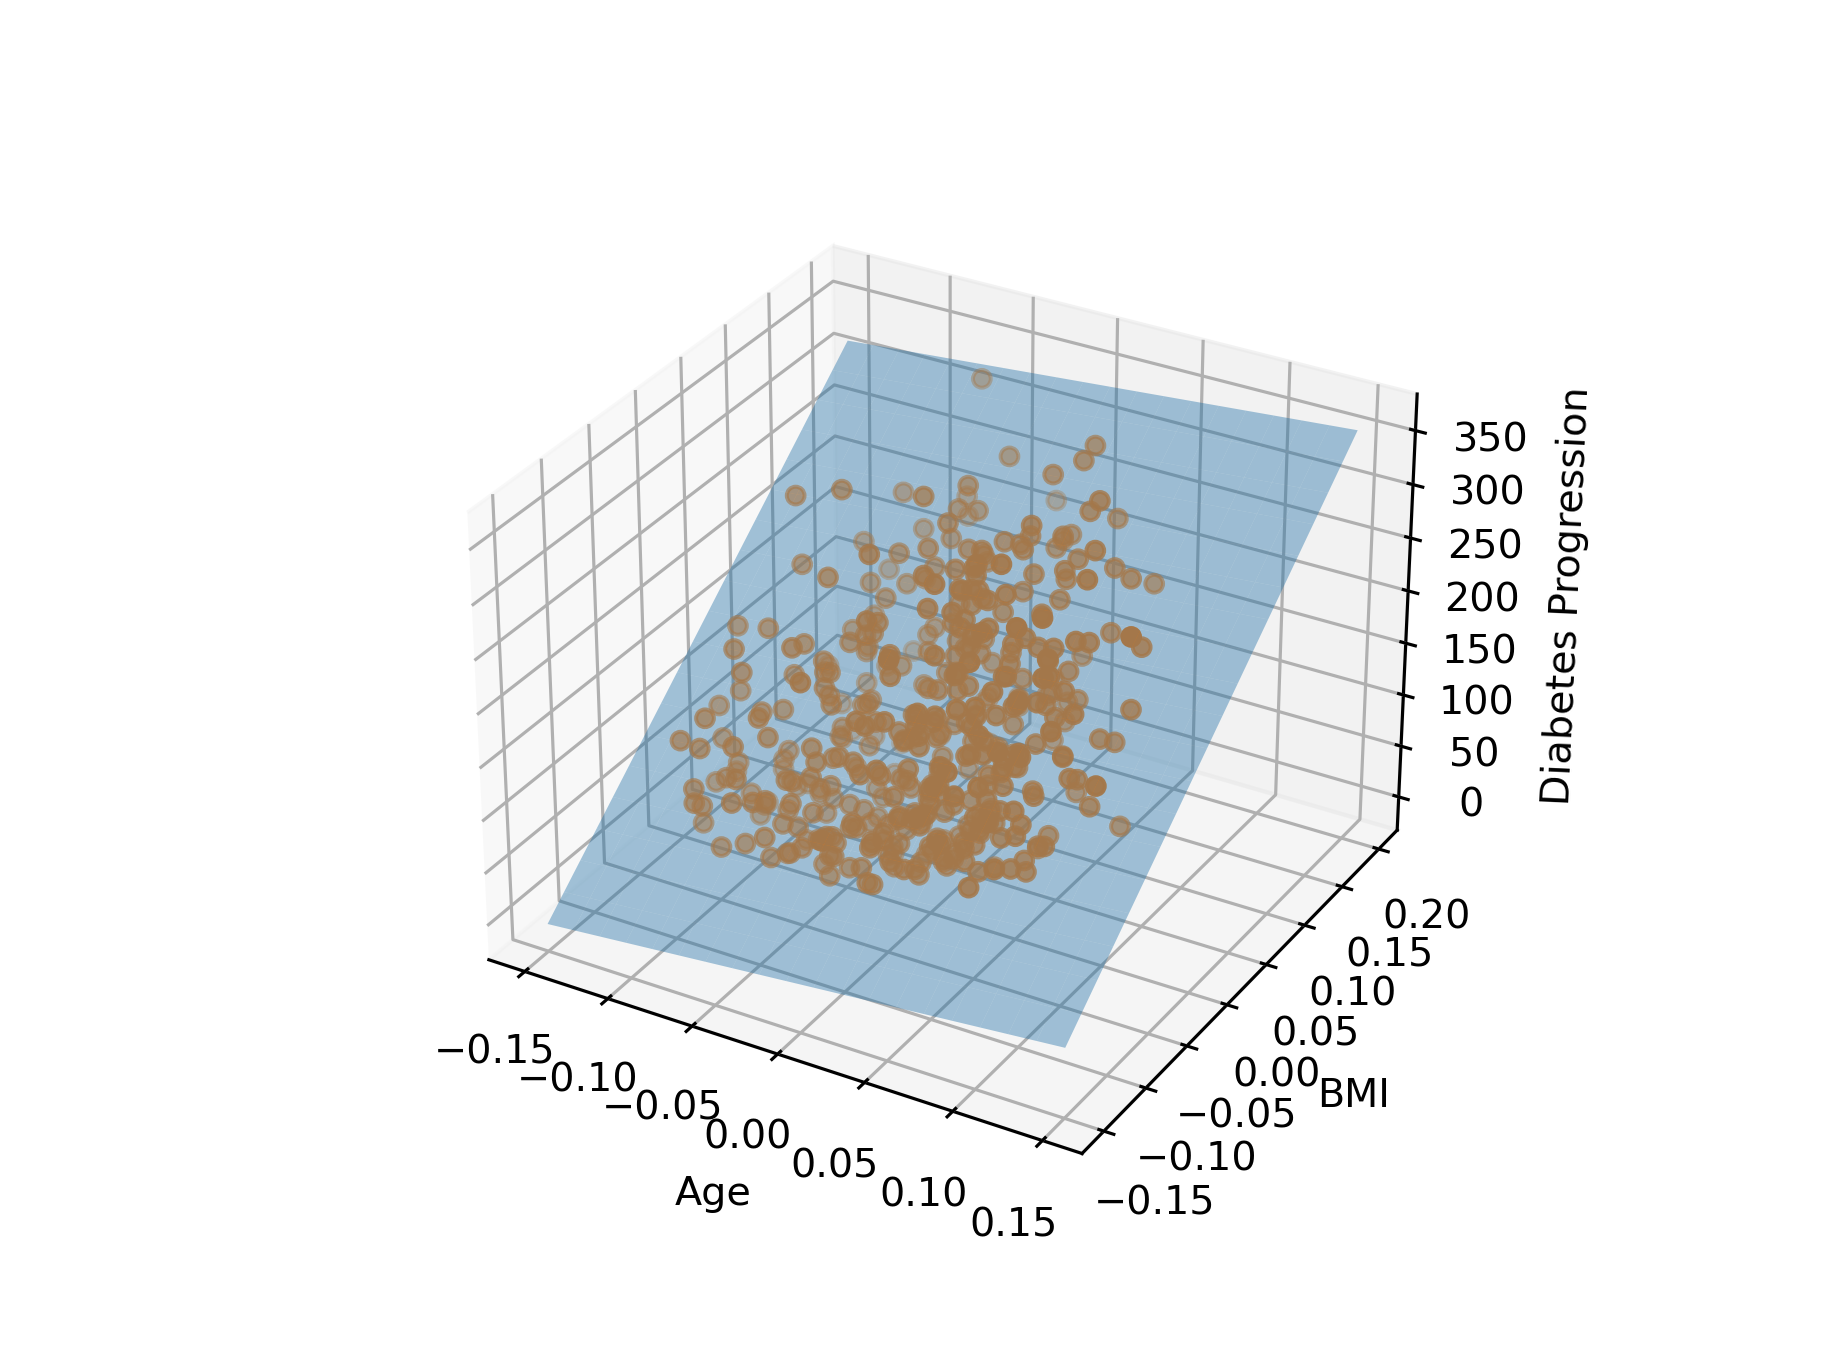

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(pX, pY, pZ, alpha=0.4);
ax.scatter3D(X[:,1],X[:,2],y,c=colors[1]);
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Diabetes Progression');

Great! we see that it does indeed do a good job!

## Calculating error

As above, lets calculate how much error there is here:

In [40]:
y_hat = # EDIT HERE

In [41]:
myMSE(y_hat,y)

3851.799194709598

---

# Problem 4 - Linear Regression for Classification

We will discuss much better ways to specify a linear classifier, but for right now, we have one: the linear regression hyper-plane! All we have to do is then "threshold" the linear model to make a classification! 


## Dataset Preparation

For this problem, lets use another **toy dataset** that already comes loaded in the `scikit-learn`library: the **iris** dataset.

In [42]:
iris = datasets.load_iris()

As described above, this returns `Bunch` object, giving us information about the dataset:

In [43]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

These correspond to the following measurements:

![](../assets/iris.jpg)

And the names of the targets/classes:

In [44]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

This dataset has **3 classes** and **4 features**. To make things simpler (and our plotting simpler), lets just use **two classes** with **two features** for now.

So lets slice up the original dataset to give us only the `setosa` and `versicolor` flowers, and as features, `sepal length` and `sepal width`.

In [45]:
X = iris.data[:100,:2]
y = iris.target[:100]*2-1
X.shape,y.shape

((100, 2), (100,))

Lets make sure to add that extra column of 1's to our `X` matrix! Yet another convenient way to do this, is to use:

```python
np.insert
```

In [46]:
np.insert?

Here we see we need to pass:
- `obj`: the index (weird name)
- `values`: the value to insert (broadcasting allowed)
- `axis`: along which axis to do the insertion

In [47]:
X = np.insert(X,obj=0,values=1,axis=1)
X.shape

(100, 3)

Great! The shape is what we want! 

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  Rerunning that line multiple times will keep inserting `1`'s so be careful! 

</div>

Lets check the first few rows to verify:

In [48]:
# EDIT HERE

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6]])

Now we can plot what we have! 

<IPython.core.display.Javascript object>


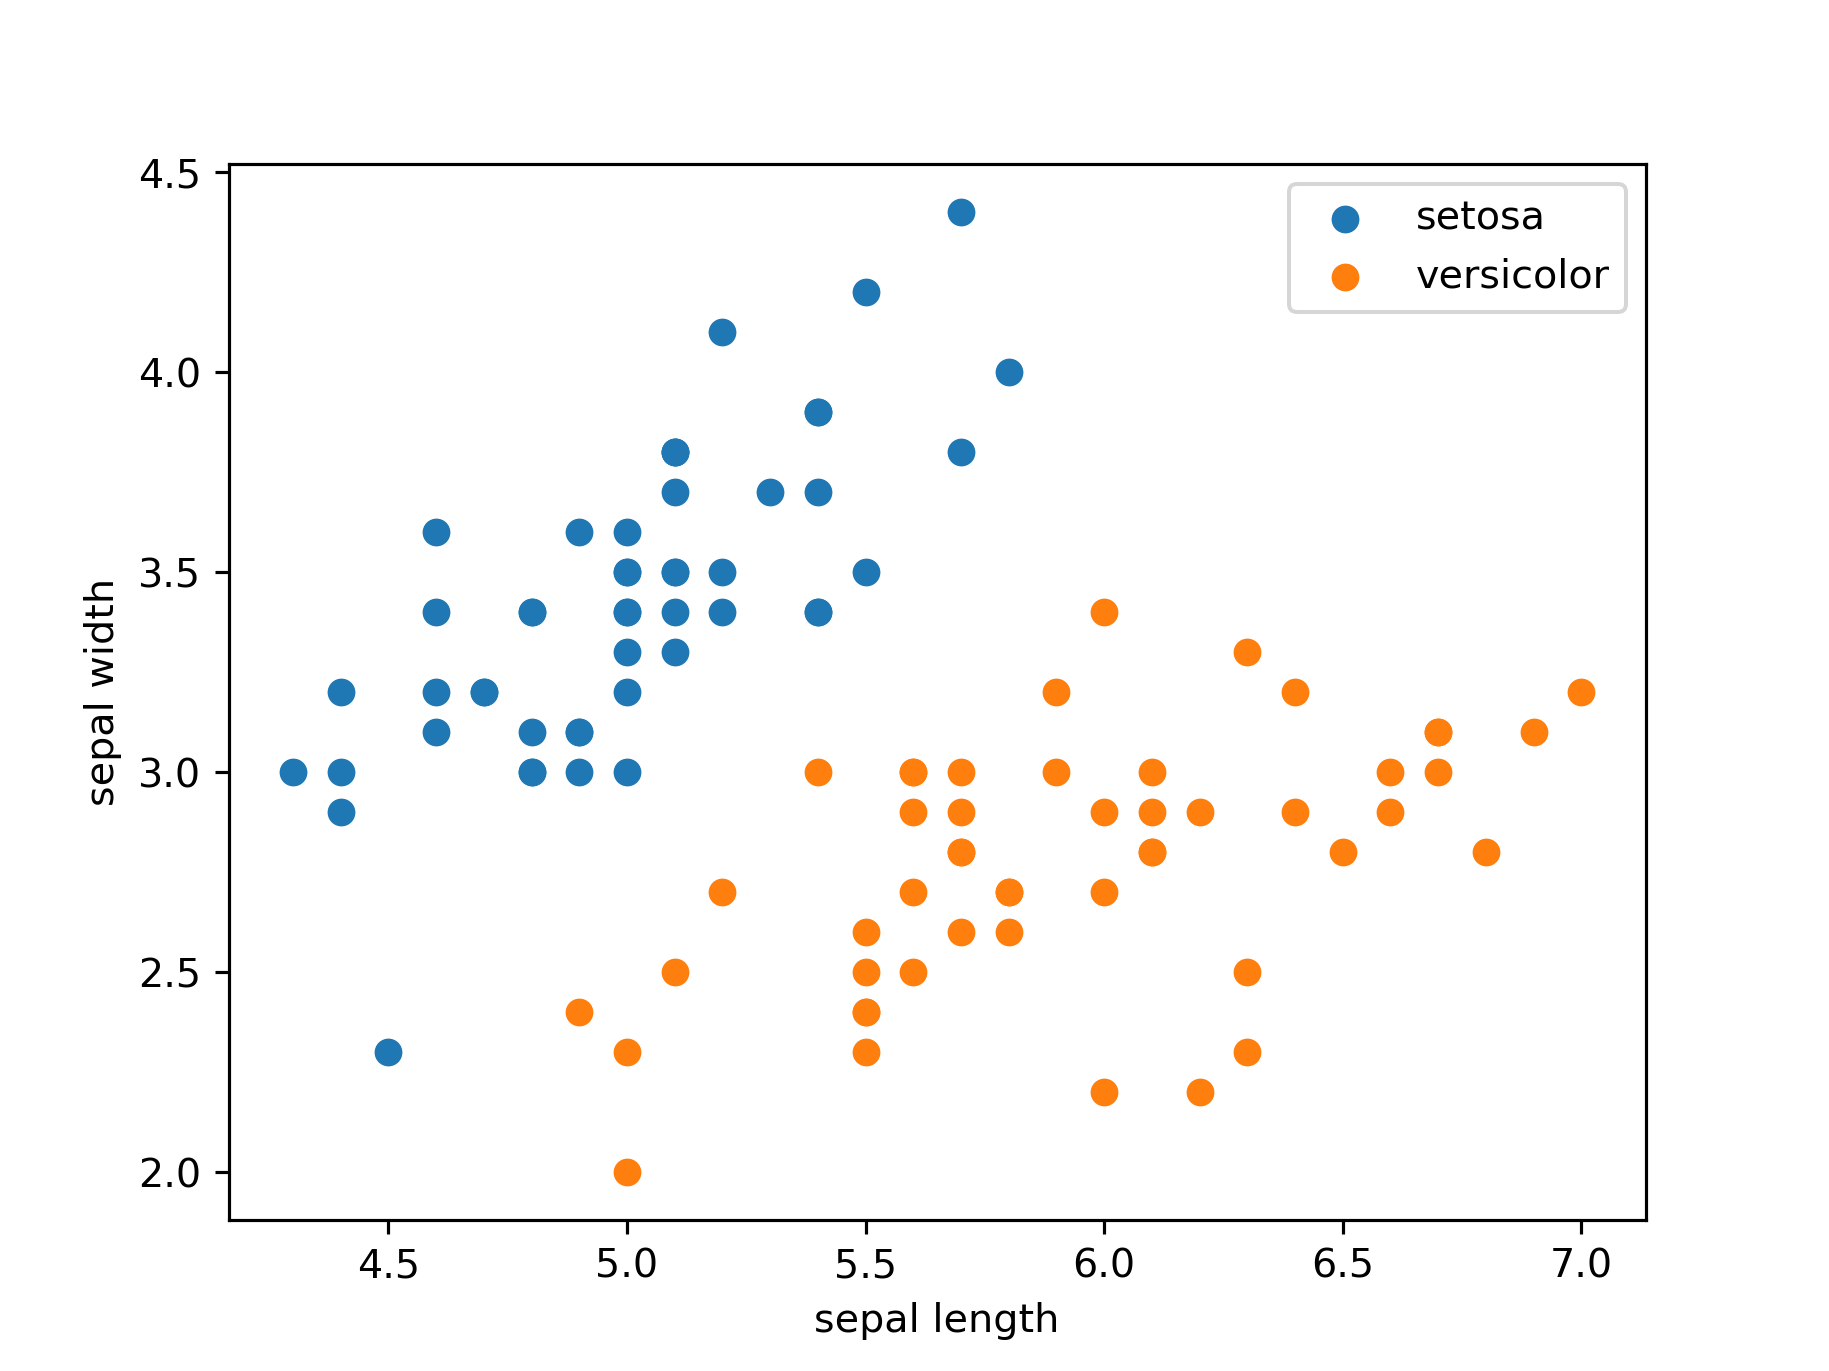

In [49]:
plt.figure()
plt.scatter(X[y==-1,1],X[y==-1,2],label='setosa');
plt.scatter(X[y==1,1],X[y==1,2],label='versicolor');
plt.xlabel('sepal length')
plt.ylabel('sepal width');
plt.legend();

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  Make note of the "advanced-indexing" technique to grab the correct portion of our dataset matrix `X` here. This is also discussed in the interactive "textbook" Python Like You Mean It (PLYMI) in **Module 3**, under [Advanced Indexing🔗](../PLYMI/Module3/AdvancedIndexing.ipynb)

</div>

Now that we've noticed it, lets save it for easier reading later:

In [50]:
setosa_X = X[y==-1,:]
versicolor_X = X[y==1,:]

Hm. Wait a second...about that plot...

<br/>
<div class='info'>
    
<font size='5'>🤷🏽‍♂️</font> **Pause-and-Ponder:** Why is this a 2D plot? Previously I only had 1 feature (`age`) and I also looked at a 2D plot. Now, I have two features `sepal length` and `sepal width` and I still have a 2D plot? What are your thoughts on this? **Comment below!**

</div>

---

---

After a bit of thought, you might realize what we are trying to do, is to perform regression on this space:

<IPython.core.display.Javascript object>


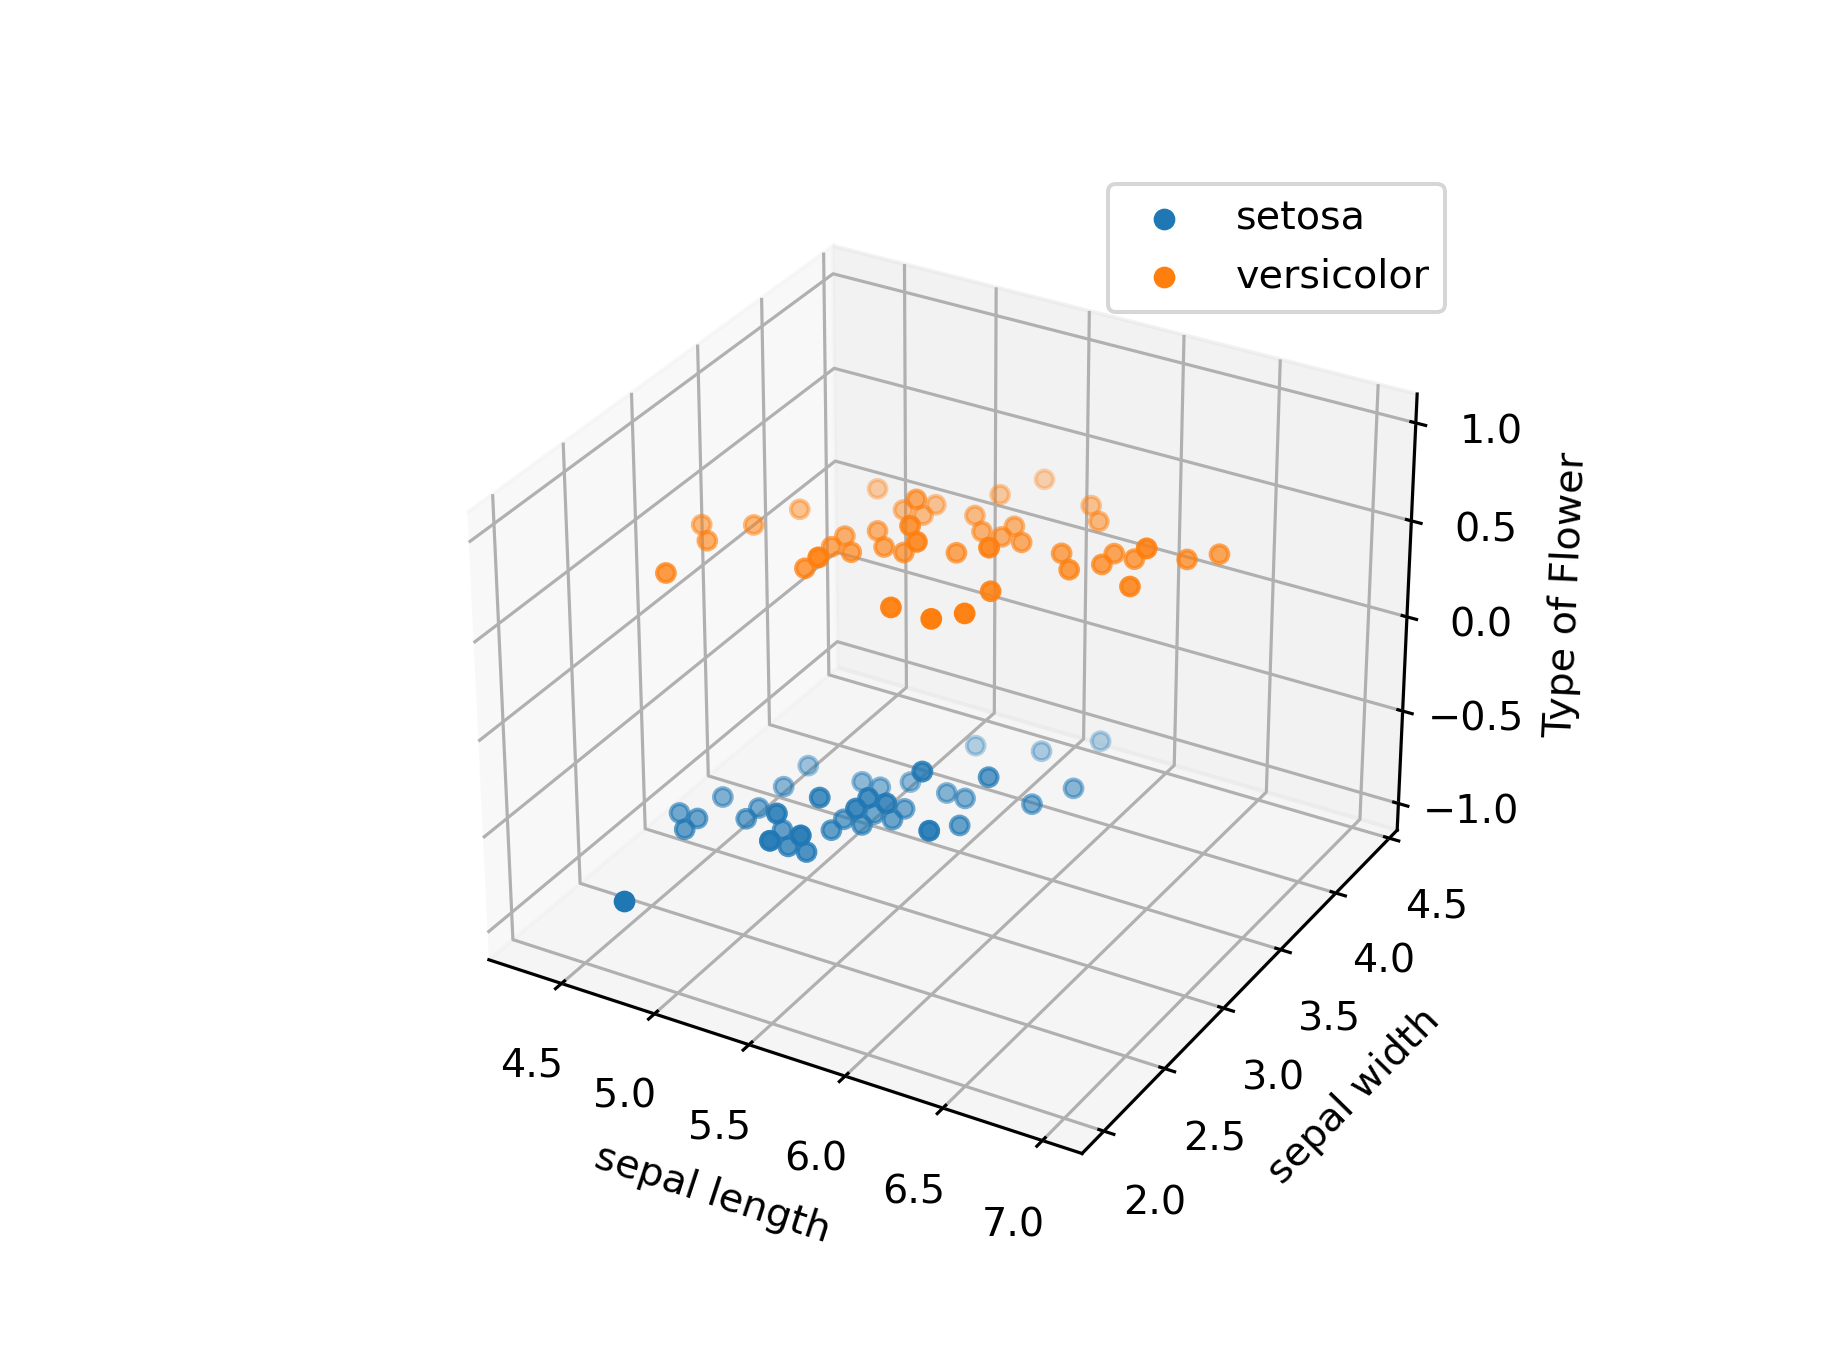

In [51]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(setosa_X[:,1], setosa_X[:,2], -1, label='setosa');
ax.scatter3D(versicolor_X[:,1], versicolor_X[:,2], 1, label='versicolor');
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('Type of Flower')
plt.legend();

Where the orange points have a $\boldsymbol{y}=1$ value and the blue points have a $\boldsymbol{y}=-1$ value, and there are no points in between. 

Clearly this is not an ideal situation for linear regression, but lets go ahead and see how good it can do! 

## The best "line"

As above, lets calculate the best hyper-plane and plot it:

In [52]:
w_lin = # EDIT HERE

Now the plotting code as before:

In [53]:
px = np.linspace(4,7,20)
py = np.linspace(2,5,20)
pX,pY = np.meshgrid(px,py)
pZ = w_lin[0] + pX*w_lin[1] + pY*w_lin[2]

<IPython.core.display.Javascript object>


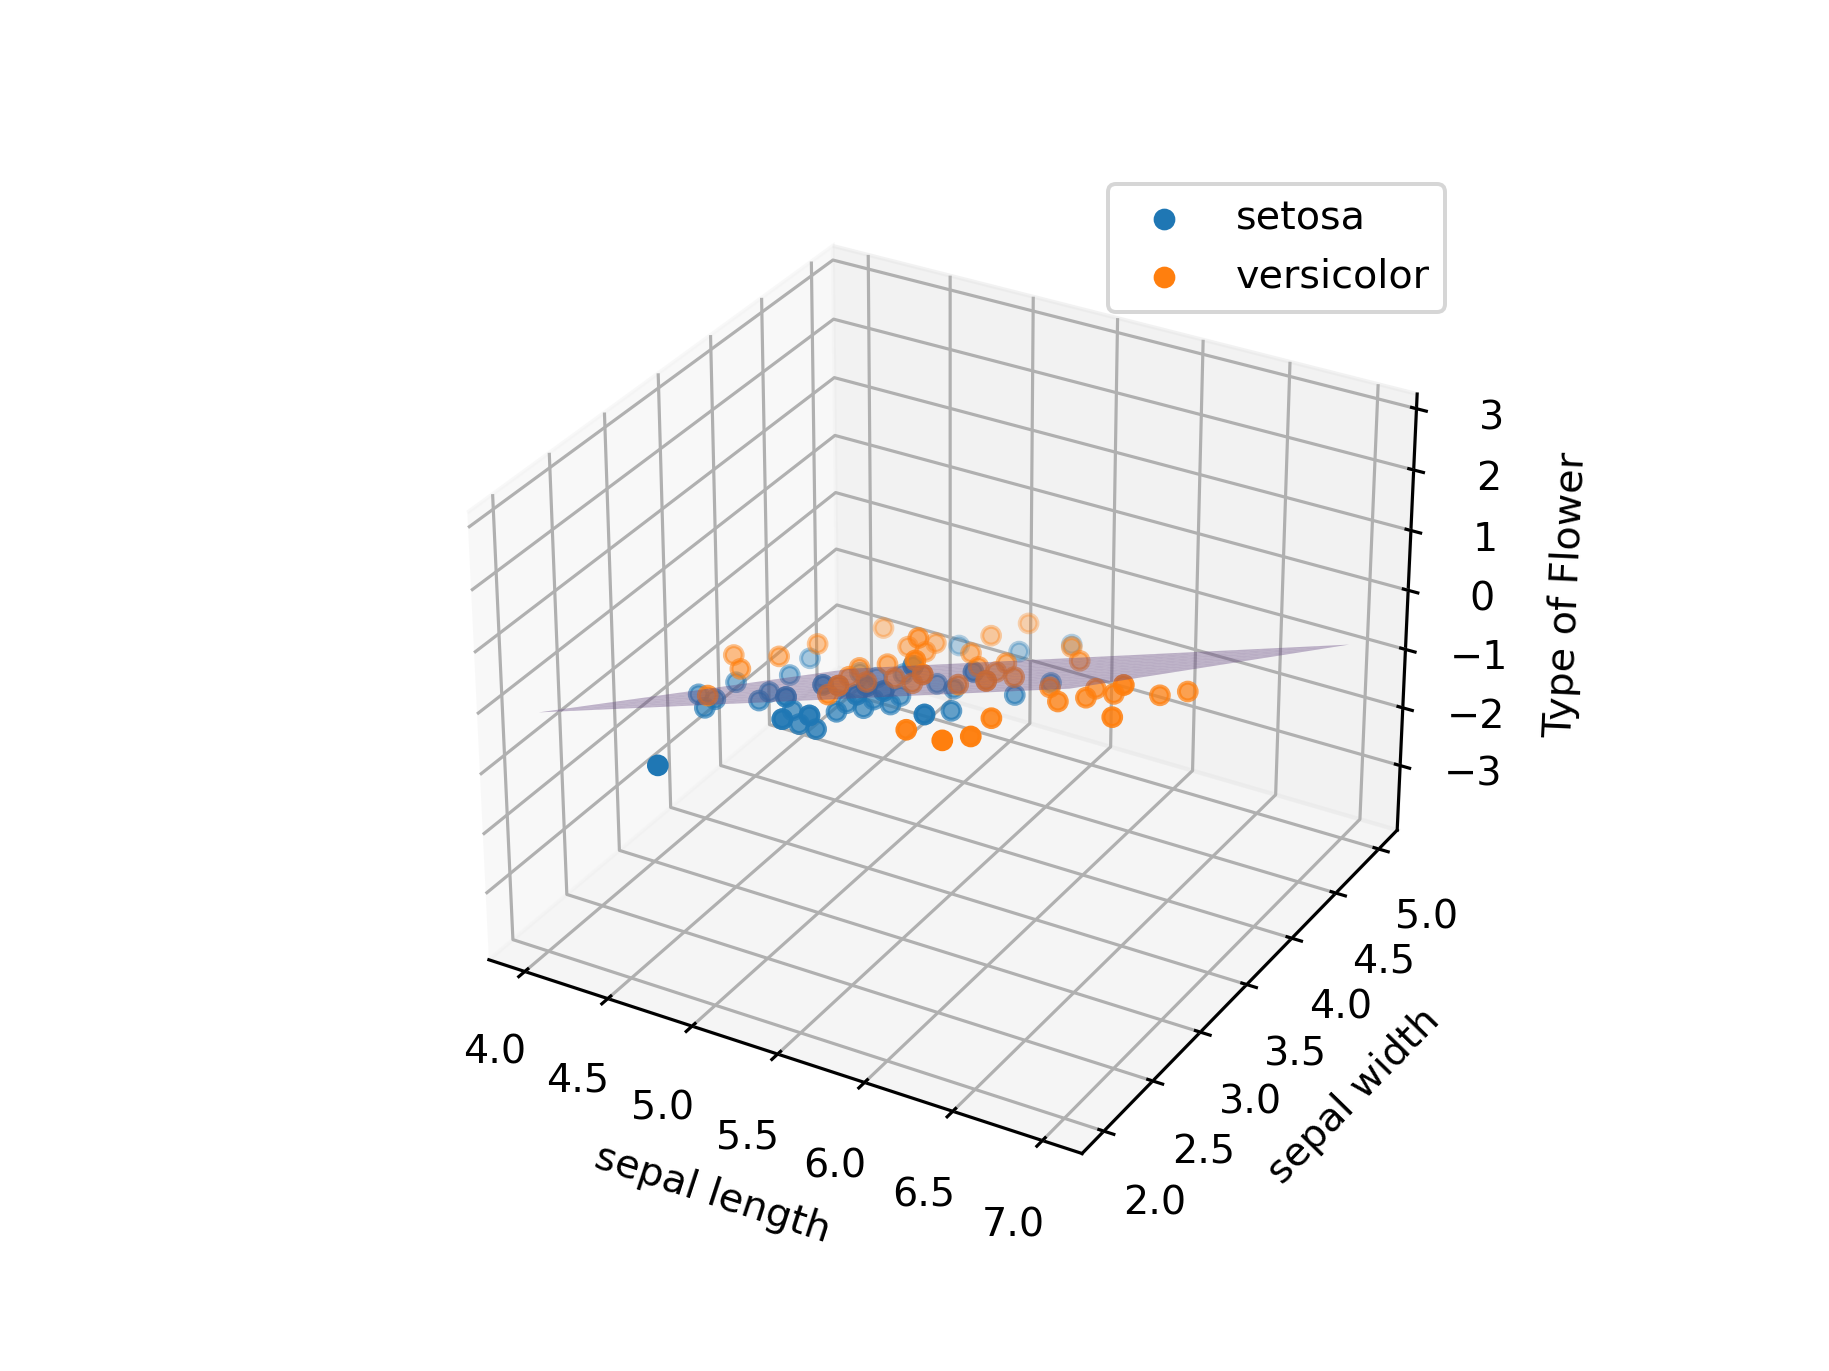

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plot hyper-plane
ax.plot_surface(pX, pY, pZ, alpha=0.4, color=colors[4]);

# plot classes
ax.scatter3D(setosa_X[:,1], setosa_X[:,2], -1, label='setosa');
ax.scatter3D(versicolor_X[:,1], versicolor_X[:,2], 1, label='versicolor');

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('Type of Flower')
plt.legend();

Hm. That may be a bit hard to see. Lets compare with a flat 2D version. To do that, lets find where the line crosses the X-Y plane using this standard formula:

In [55]:
slope_lin = -(w_lin[0]/w_lin[2])/(w_lin[0]/w_lin[1])
intercept_lin = -w_lin[0]/w_lin[2]

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  Its ok if you dont recognize this - this is just for plotting!

</div>

With this in hand, lets plot the flat 2D version:

<IPython.core.display.Javascript object>


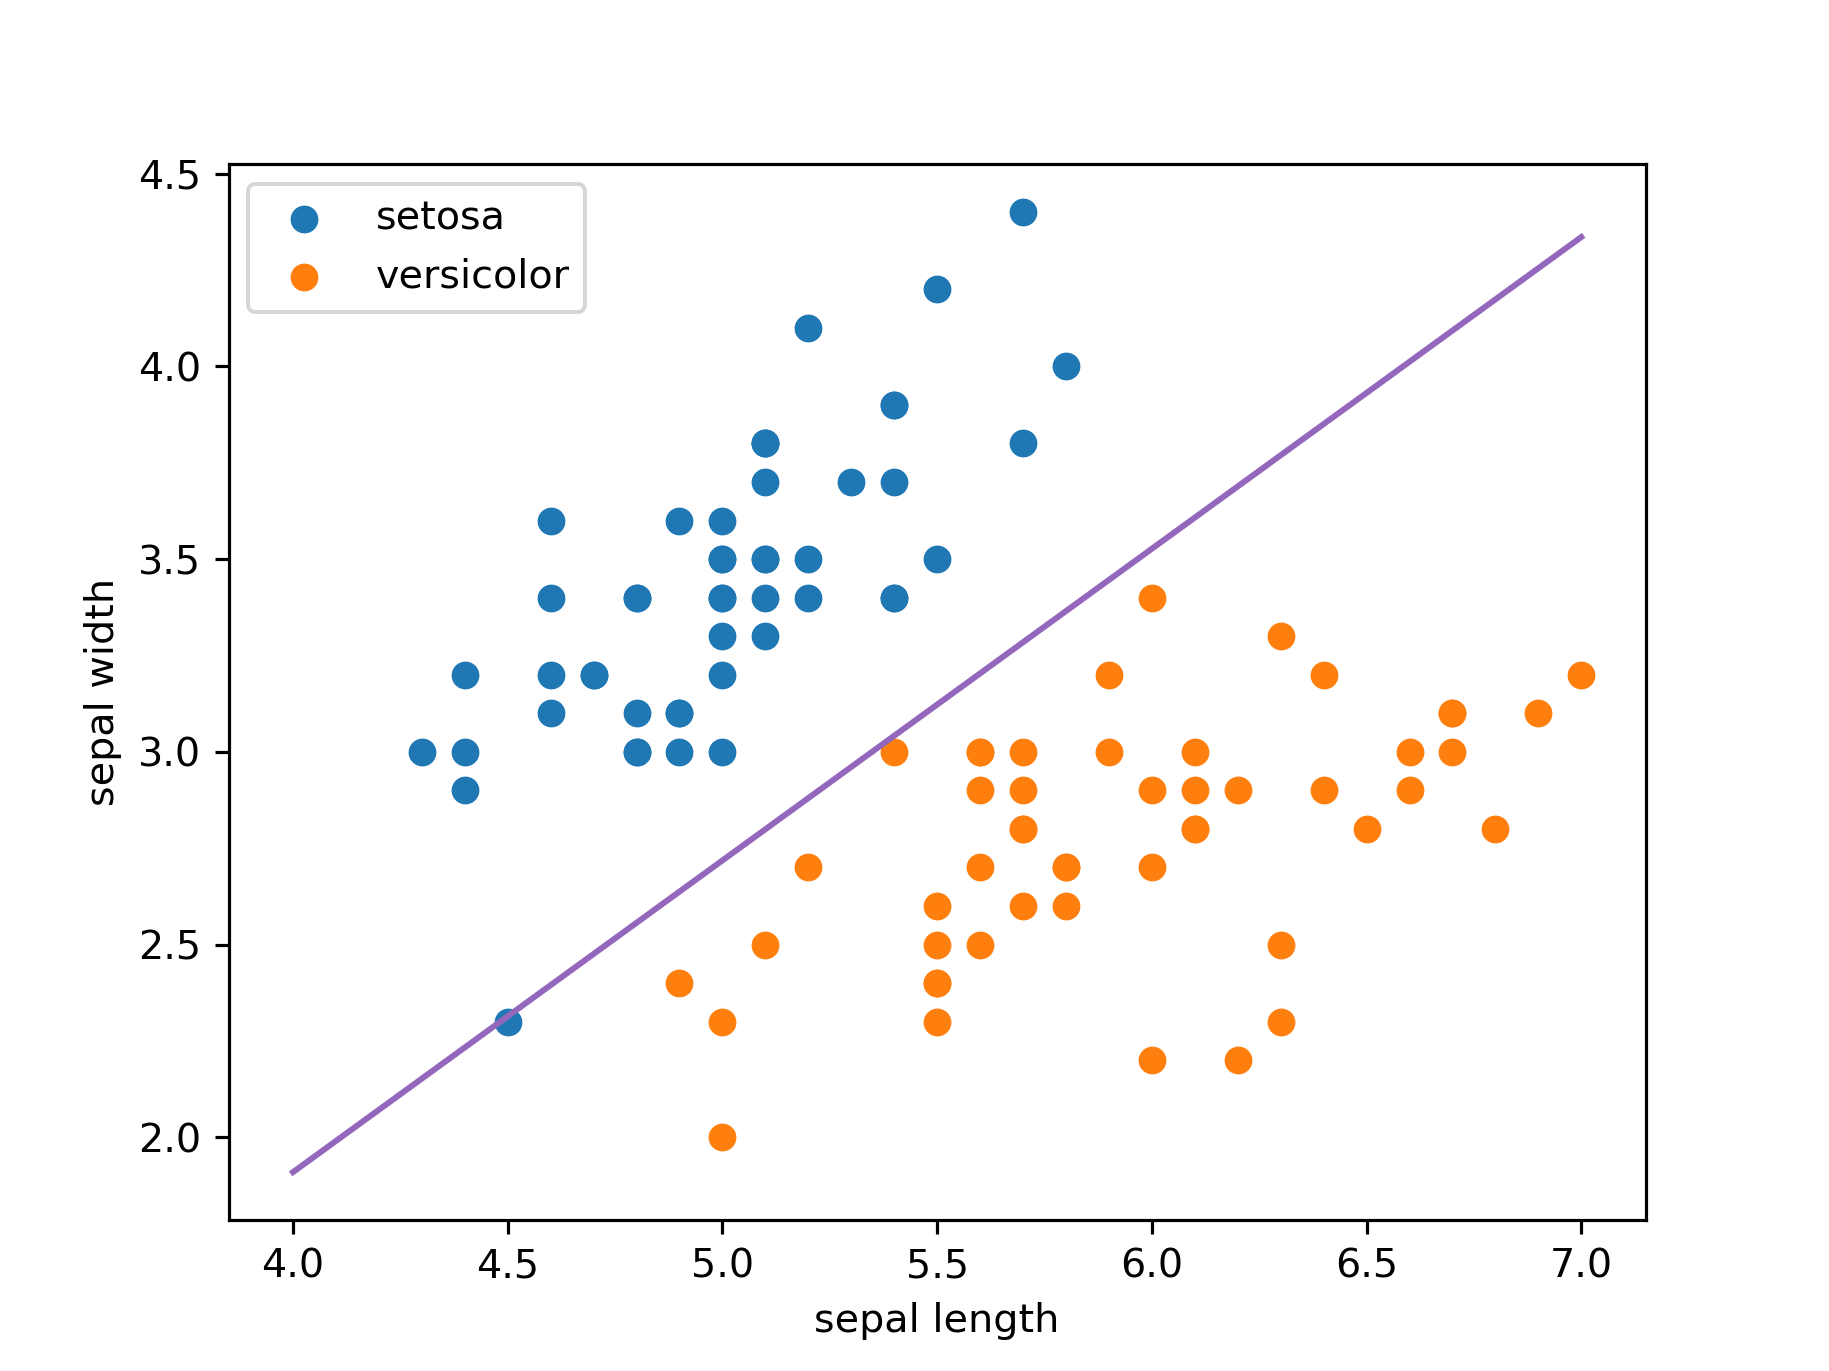

In [56]:
plt.figure()
plt.scatter(X[y==-1,1],X[y==-1,2],label='setosa');
plt.scatter(X[y==1,1],X[y==1,2],label='versicolor');
plt.plot(px, px*slope_lin + intercept_lin, color=colors[4])
plt.xlabel('sepal length')
plt.ylabel('sepal width');
plt.legend();

Ah this makes much more sense! Lets quickly combine the two plots and see if that helps:

<IPython.core.display.Javascript object>


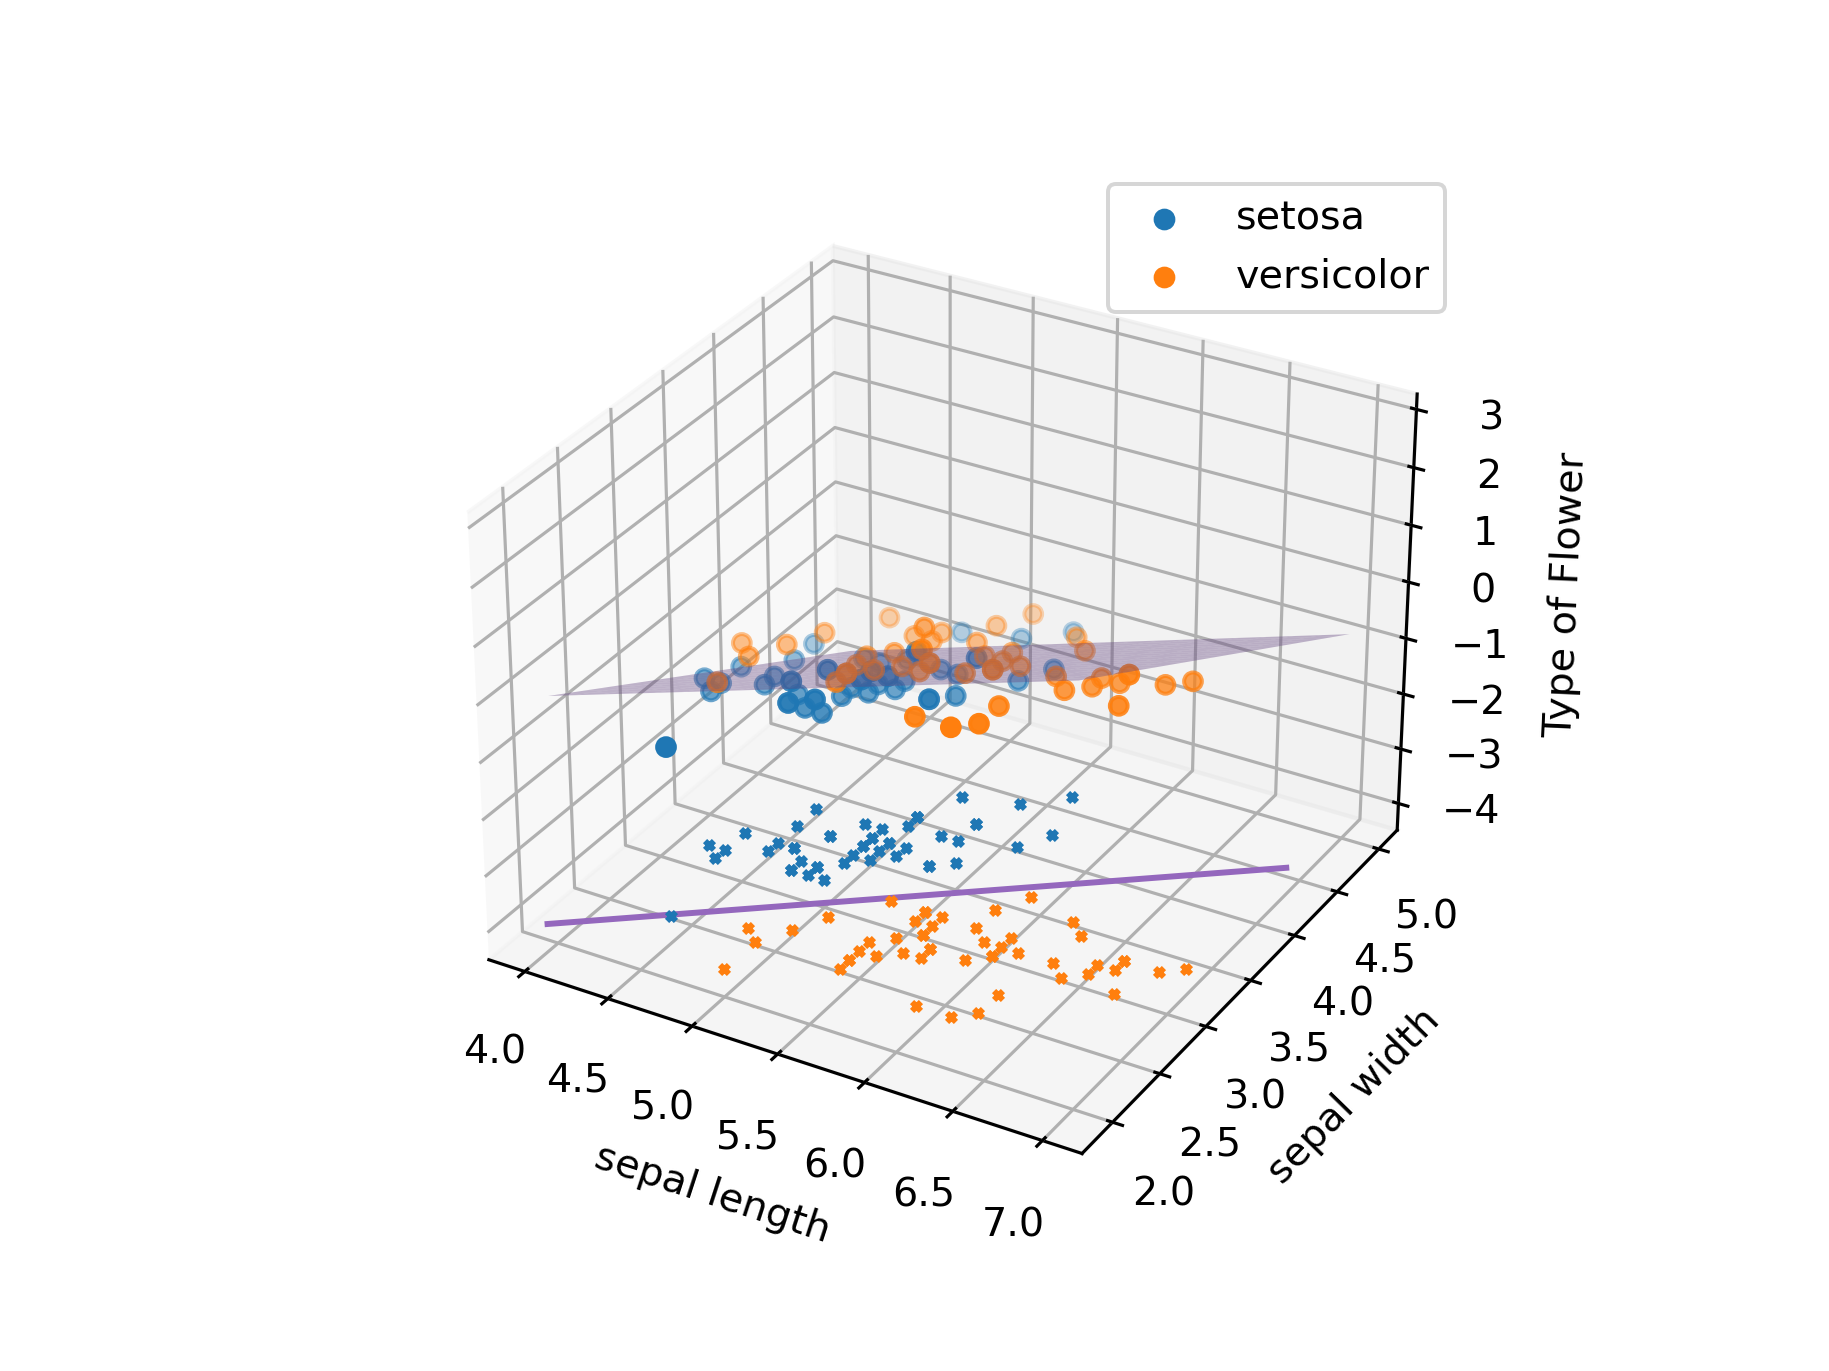

In [57]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# plot hyper-plane
ax.plot_surface(pX, pY, pZ, alpha=0.4, color=colors[4]);

# plot classes
ax.scatter3D(setosa_X[:,1], setosa_X[:,2], -1, label='setosa');
ax.scatter3D(versicolor_X[:,1], versicolor_X[:,2], 1, label='versicolor');

# 2d projection
ax.scatter(setosa_X[:,1], setosa_X[:,2], color=colors[0], 
           zdir='z', zs=-4, depthshade=False,
           s=5, marker='x')
ax.scatter(versicolor_X[:,1], versicolor_X[:,2], color=colors[1], 
           zdir='z', zs=-4, depthshade=False,
          s=5, marker='x')

# 2d line
plt.plot(px, px*slope_lin + intercept_lin, color=colors[4],
         zdir='z', zs=-4)


ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('Type of Flower')
plt.legend();

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Think about what you are seeing here. Does this resonate with what we've discussed in class? Whar are your thoughts? Comment below!

</div>

---

---

## Make predictions

How we actually use this linear regression model to make classifications? Well, lets first form our $\hat{\boldsymbol{y}}$ as before:

In [58]:
y_hat = # EDIT HERE
y_hat[:5]

array([-0.83096757, -0.42997369, -0.85876366, -0.83607755, -1.04536256])

Now, lets take their **sign** to make our classification!

In [59]:
y_hat_class = np.sign(y_hat)
y_hat_class[:5]

array([-1., -1., -1., -1., -1.])

Lets see how well we did by just **counting up the number of errors we made!** That is, calcualte how many times `y_hat_class` and `y` disagree! 

In [60]:
# EDIT HERE


1

Wow! Only 1 error! Not bad! 

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:** While this was a fun example, we wouldn't usually expect linear regression to perform so well on a classification problem! 

</div>

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:** Can you think about reasons why? Comment below! 

</div>

---

---

# Comparison with "real" implementation

Now, lets quickly compare with `scikit-learn`'s real implementation of Linear Regression:

In [61]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X[:,1:], y)
print("Regression coefficiants:",reg.coef_)
print("Regression intercept:",reg.intercept_)

Regression coefficiants: [ 0.95854437 -1.18540551]
Regression intercept: -1.5706245592620673


How does our `w_lin` compare?

In [62]:
w_lin

array([-1.57062456,  0.95854437, -1.18540551])

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  What do you observe here? Does this make sense? Comment below!

</div>

---

---